# Creating FSL 3-column files for Intertemporal Choice and MID

For the MID task, there are 5 total conditions, two immediate rewards and two delayed rewards along with a control non-rewarded "Practice" condition. In the data, each of the 5 conditions is dummy coded as the following:
1=SS1 (\$5 today) 2=SS2 (\$25 today) 3=SS3 (\$5 in one month) 4=SS4 (\$25 in one month) 5= Practice (\$0)
In the MID task, trials need to be excluded if they cheated (pressed before neurobiologically possible) or if they don't respond at all, and these covariate regressors need to be estimated separately in the model. HOWEVER, this only needs to exclude the win/loss portion of the trial not the reward anticipation portion. In the future it might be worth seeing how non-response trials removal of anticipation period (perhaps they aren't paying attention/falling asleep or whatever) will reduce noise for the estimated model.

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
%matplotlib inline
import os
import sys

In [81]:
sub = 109

In [82]:
Day1ITC1 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_day1.txt" % (sub,sub),sep="\t")
Day1ITC2 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_day1.txt" % (sub,sub),sep="\t")
#Day2ITC1 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_day2.txt" % (sub,sub),sep="\t")
#Day2ITC2 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_day2.txt" % (sub,sub),sep="\t")
Day1MID1 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_day1.txt" % (sub,sub),sep="\t")
Day1MID2 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_day1.txt" % (sub,sub),sep="\t")
#Day2MID1 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_day2.txt" % (sub,sub),sep="\t")
#Day2MID2 = pd.read_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_day2.txt" % (sub,sub),sep="\t")


# MID Task 3-column file creation

In [83]:
Day1ITC1_cv = Day1ITC1[Day1ITC1.RT > 10]
Day1ITC2_cv = Day1ITC2[Day1ITC2.RT > 10]
Day2ITC1_cv = Day2ITC1[Day2ITC1.RT > 10]
Day2ITC2_cv = Day2ITC2[Day2ITC2.RT > 10]
Day1MID1_cv = Day1MID1[(Day1MID1.RT > 2) | (Day1MID1.RT < 0.1)] 
Day1MID2_cv = Day1MID2[(Day1MID2.RT > 2) | (Day1MID2.RT < 0.1)]
Day2MID1_cv = Day2MID1[(Day2MID1.RT > 2) | (Day2MID1.RT < 0.1)]
Day2MID2_cv = Day2MID2[(Day2MID2.RT > 2) | (Day2MID2.RT < 0.1)]

Day1ITC1_cl = Day1ITC1[Day1ITC1.RT < 10]
Day1ITC2_cl = Day1ITC2[Day1ITC2.RT < 10]
Day2ITC1_cl = Day2ITC1[Day2ITC1.RT < 10]
Day2ITC2_cl = Day2ITC2[Day2ITC2.RT < 10]
Day1MID1_cl = Day1MID1[(Day1MID1.RT < 2) | (Day1MID1.RT >= 0.1)]
Day1MID2_cl = Day1MID2[(Day1MID2.RT < 2) | (Day1MID2.RT >= 0.1)]
Day2MID1_cl = Day2MID1[(Day2MID1.RT < 2) | (Day2MID1.RT >= 0.1)]
Day2MID2_cl = Day2MID2[(Day2MID2.RT < 2) | (Day2MID2.RT >= 0.1)]

In [84]:
MID_frames = {}

for z in [1,2,3,4,5]:
    MID_frames["Day1MID1_%d" % (z)] = pd.DataFrame(Day1MID1[Day1MID1.Condition == z])
    MID_frames["Day1MID2_%d" % (z)] = pd.DataFrame(Day1MID2[Day1MID2.Condition == z])
    MID_frames["Day2MID1_%d" % (z)] = pd.DataFrame(Day2MID1[Day2MID1.Condition == z])
    MID_frames["Day2MID2_%d" % (z)] = pd.DataFrame(Day2MID2[Day2MID2.Condition == z])
    #For wins, the OUTCOME needs to be 1 because despite structure if they take >0.5s they still can lose (outcome = 6)
    MID_frames["Day1MID1_win%d" % (z)] = pd.DataFrame(Day1MID1_cl[(Day1MID1_cl.WLstruct == 1) & (Day1MID1_cl.Condition == z)])
    MID_frames["Day1MID2_win%d" % (z)] = pd.DataFrame(Day1MID2_cl[(Day1MID2_cl.WLstruct == 1) & (Day1MID2_cl.Condition == z)])
    MID_frames["Day2MID1_win%d" % (z)] = pd.DataFrame(Day2MID1_cl[(Day2MID1_cl.WLstruct == 1) & (Day2MID1_cl.Condition == z)])
    MID_frames["Day2MID2_win%d" % (z)] = pd.DataFrame(Day2MID2_cl[(Day2MID2_cl.WLstruct == 1) & (Day2MID2_cl.Condition == z)])
    MID_frames["Day1MID1_loss%d" % (z)] = pd.DataFrame(Day1MID1_cl[(Day1MID1_cl.WLstruct == 0) & (Day1MID1_cl.Condition == z)])
    MID_frames["Day1MID2_loss%d" % (z)] = pd.DataFrame(Day1MID2_cl[(Day1MID2_cl.WLstruct == 0) & (Day1MID2_cl.Condition == z)])
    MID_frames["Day2MID1_loss%d" % (z)] = pd.DataFrame(Day2MID1_cl[(Day2MID1_cl.WLstruct == 0) & (Day2MID1_cl.Condition == z)])
    MID_frames["Day2MID2_loss%d" % (z)] = pd.DataFrame(Day2MID2_cl[(Day2MID2_cl.WLstruct == 0) & (Day2MID2_cl.Condition == z)])
    ###
    MID_frames["Day1MID1_WL%d_cv" % (z)] = pd.DataFrame(Day1MID1_cv[Day1MID1_cv.Condition == z])
    MID_frames["Day1MID2_WL%d_cv" % (z)] = pd.DataFrame(Day1MID2_cv[Day1MID2_cv.Condition == z])
    MID_frames["Day2MID1_WL%d_cv" % (z)] = pd.DataFrame(Day2MID1_cv[Day2MID1_cv.Condition == z])
    MID_frames["Day2MID2_WL%d_cv" % (z)] = pd.DataFrame(Day2MID2_cv[Day2MID2_cv.Condition == z])

In [85]:
Day1MID1_Cue1 = pd.concat([MID_frames["Day1MID1_1"]['CueUp'], MID_frames["Day1MID1_1"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue1['height'] = 1
Day1MID1_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID2_Cue1 = pd.concat([MID_frames["Day1MID2_1"]['CueUp'], MID_frames["Day1MID2_1"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue1['height'] = 1
Day1MID2_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Cue1 = pd.concat([MID_frames["Day2MID1_1"]['CueUp'], MID_frames["Day2MID1_1"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Cue1['height'] = 1
#Day2MID1_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Cue1 = pd.concat([MID_frames["Day2MID2_1"]['CueUp'], MID_frames["Day2MID2_1"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Cue1['height'] = 1
#Day2MID2_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue2 = pd.concat([MID_frames["Day1MID1_2"]['CueUp'], MID_frames["Day1MID1_2"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue2['height'] = 1
Day1MID1_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue2 = pd.concat([MID_frames["Day1MID2_2"]['CueUp'], MID_frames["Day1MID2_2"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue2['height'] = 1
Day1MID2_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Cue2 = pd.concat([MID_frames["Day2MID1_2"]['CueUp'], MID_frames["Day2MID1_2"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Cue2['height'] = 1
#Day2MID1_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Cue2 = pd.concat([MID_frames["Day2MID2_2"]['CueUp'], MID_frames["Day2MID2_2"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Cue2['height'] = 1
#Day2MID2_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue3 = pd.concat([MID_frames["Day1MID1_3"]['CueUp'], MID_frames["Day1MID1_3"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue3['height'] = 1
Day1MID1_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue3 = pd.concat([MID_frames["Day1MID2_3"]['CueUp'], MID_frames["Day1MID2_3"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue3['height'] = 1
Day1MID2_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Cue3 = pd.concat([MID_frames["Day2MID1_3"]['CueUp'], MID_frames["Day2MID1_3"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Cue3['height'] = 1
#Day2MID1_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Cue3 = pd.concat([MID_frames["Day2MID2_3"]['CueUp'], MID_frames["Day2MID2_3"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Cue3['height'] = 1
#Day2MID2_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue4 = pd.concat([MID_frames["Day1MID1_4"]['CueUp'], MID_frames["Day1MID1_4"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue4['height'] = 1
Day1MID1_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue4 = pd.concat([MID_frames["Day1MID2_4"]['CueUp'], MID_frames["Day1MID2_4"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue4['height'] = 1
Day1MID2_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Cue4 = pd.concat([MID_frames["Day2MID1_4"]['CueUp'], MID_frames["Day2MID1_4"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Cue4['height'] = 1
#Day2MID1_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Cue4 = pd.concat([MID_frames["Day2MID2_4"]['CueUp'], MID_frames["Day2MID2_4"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Cue4['height'] = 1
#Day2MID2_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue5 = pd.concat([MID_frames["Day1MID1_5"]['CueUp'], MID_frames["Day1MID1_5"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue5['height'] = 1
Day1MID1_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue5 = pd.concat([MID_frames["Day1MID2_5"]['CueUp'], MID_frames["Day1MID2_5"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue5['height'] = 1
Day1MID2_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Cue5 = pd.concat([MID_frames["Day2MID1_5"]['CueUp'], MID_frames["Day2MID1_5"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Cue5['height'] = 1
#Day2MID1_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Cue5 = pd.concat([MID_frames["Day2MID2_5"]['CueUp'], MID_frames["Day2MID2_5"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Cue5['height'] = 1
#Day2MID2_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)


In [86]:
#Create the regressors for the Win/Loss
Day1MID1_Win1 = pd.concat([MID_frames["Day1MID1_win1"]['RewUp'], MID_frames["Day1MID1_win1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Win1['height'] = 1
Day1MID1_Win1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Win1 = pd.concat([MID_frames["Day1MID2_win1"]['RewUp'], MID_frames["Day1MID2_win1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Win1['height'] = 1
Day1MID2_Win1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Win1 = pd.concat([MID_frames["Day2MID1_win1"]['RewUp'], MID_frames["Day2MID1_win1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Win1['height'] = 1
#Day2MID1_Win1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Win1 = pd.concat([MID_frames["Day2MID2_win1"]['RewUp'], MID_frames["Day2MID2_win1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Win1['height'] = 1
#Day2MID2_Win1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Lose1 = pd.concat([MID_frames["Day1MID1_loss1"]['RewUp'], MID_frames["Day1MID1_loss1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Lose1['height'] = 1
Day1MID1_Lose1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Lose1 = pd.concat([MID_frames["Day1MID2_loss1"]['RewUp'], MID_frames["Day1MID2_loss1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Lose1['height'] = 1
Day1MID2_Lose1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Lose1 = pd.concat([MID_frames["Day2MID1_loss1"]['RewUp'], MID_frames["Day2MID1_loss1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Lose1['height'] = 1
#Day2MID1_Lose1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Lose1 = pd.concat([MID_frames["Day2MID2_loss1"]['RewUp'], MID_frames["Day2MID2_loss1"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Lose1['height'] = 1
#Day2MID2_Lose1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Win2 = pd.concat([MID_frames["Day1MID1_win2"]['RewUp'], MID_frames["Day1MID1_win2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Win2['height'] = 1
Day1MID1_Win2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Win2 = pd.concat([MID_frames["Day1MID2_win2"]['RewUp'], MID_frames["Day1MID2_win2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Win2['height'] = 1
Day1MID2_Win2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Win2 = pd.concat([MID_frames["Day2MID1_win2"]['RewUp'], MID_frames["Day2MID1_win2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Win2['height'] = 1
#Day2MID1_Win2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Win2 = pd.concat([MID_frames["Day2MID2_win2"]['RewUp'], MID_frames["Day2MID2_win2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Win2['height'] = 1
#Day2MID2_Win2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Lose2 = pd.concat([MID_frames["Day1MID1_loss2"]['RewUp'], MID_frames["Day1MID1_loss2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Lose2['height'] = 1
Day1MID1_Lose2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Lose2 = pd.concat([MID_frames["Day1MID2_loss2"]['RewUp'], MID_frames["Day1MID2_loss2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Lose2['height'] = 1
Day1MID2_Lose2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Lose2 = pd.concat([MID_frames["Day2MID1_loss2"]['RewUp'], MID_frames["Day2MID1_loss2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Lose2['height'] = 1
#Day2MID1_Lose2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Lose2 = pd.concat([MID_frames["Day2MID2_loss2"]['RewUp'], MID_frames["Day2MID2_loss2"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Lose2['height'] = 1
#Day2MID2_Lose2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Win3 = pd.concat([MID_frames["Day1MID1_win3"]['RewUp'], MID_frames["Day1MID1_win3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Win3['height'] = 1
Day1MID1_Win3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Win3 = pd.concat([MID_frames["Day1MID2_win3"]['RewUp'], MID_frames["Day1MID2_win3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Win3['height'] = 1
Day1MID2_Win3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Win3 = pd.concat([MID_frames["Day2MID1_win3"]['RewUp'], MID_frames["Day2MID1_win3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Win3['height'] = 1
#Day2MID1_Win3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Win3 = pd.concat([MID_frames["Day2MID2_win3"]['RewUp'], MID_frames["Day2MID2_win3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Win3['height'] = 1
#Day2MID2_Win3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Lose3 = pd.concat([MID_frames["Day1MID1_loss3"]['RewUp'], MID_frames["Day1MID1_loss3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Lose3['height'] = 1
Day1MID1_Lose3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Lose3 = pd.concat([MID_frames["Day1MID2_loss3"]['RewUp'], MID_frames["Day1MID2_loss3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Lose3['height'] = 1
Day1MID2_Lose3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Lose3 = pd.concat([MID_frames["Day2MID1_loss3"]['RewUp'], MID_frames["Day2MID1_loss3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Lose3['height'] = 1
#Day2MID1_Lose3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Lose3 = pd.concat([MID_frames["Day2MID2_loss3"]['RewUp'], MID_frames["Day2MID2_loss3"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Lose3['height'] = 1
#Day2MID2_Lose3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Win4 = pd.concat([MID_frames["Day1MID1_win4"]['RewUp'], MID_frames["Day1MID1_win4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Win4['height'] = 1
Day1MID1_Win4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Win4 = pd.concat([MID_frames["Day1MID2_win4"]['RewUp'], MID_frames["Day1MID2_win4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Win4['height'] = 1
Day1MID2_Win4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Win4 = pd.concat([MID_frames["Day2MID1_win4"]['RewUp'], MID_frames["Day2MID1_win4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Win4['height'] = 1
#Day2MID1_Win4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Win4 = pd.concat([MID_frames["Day2MID2_win4"]['RewUp'], MID_frames["Day2MID2_win4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Win4['height'] = 1
#Day2MID2_Win4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Lose4 = pd.concat([MID_frames["Day1MID1_loss4"]['RewUp'], MID_frames["Day1MID1_loss4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Lose4['height'] = 1
Day1MID1_Lose4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Lose4 = pd.concat([MID_frames["Day1MID2_loss4"]['RewUp'], MID_frames["Day1MID2_loss4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Lose4['height'] = 1
Day1MID2_Lose4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Lose4 = pd.concat([MID_frames["Day2MID1_loss4"]['RewUp'], MID_frames["Day2MID1_loss4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Lose4['height'] = 1
#Day2MID1_Lose4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Lose4 = pd.concat([MID_frames["Day2MID2_loss4"]['RewUp'], MID_frames["Day2MID2_loss4"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Lose4['height'] = 1
#Day2MID2_Lose4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Win5 = pd.concat([MID_frames["Day1MID1_win5"]['RewUp'], MID_frames["Day1MID1_win5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Win5['height'] = 1
Day1MID1_Win5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Win5 = pd.concat([MID_frames["Day1MID2_win5"]['RewUp'], MID_frames["Day1MID2_win5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Win5['height'] = 1
Day1MID2_Win5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Win5 = pd.concat([MID_frames["Day2MID1_win5"]['RewUp'], MID_frames["Day2MID1_win5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Win5['height'] = 1
#Day2MID1_Win5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Win5 = pd.concat([MID_frames["Day2MID2_win5"]['RewUp'], MID_frames["Day2MID2_win5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Win5['height'] = 1
#Day2MID2_Win5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Lose5 = pd.concat([MID_frames["Day1MID1_loss5"]['RewUp'], MID_frames["Day1MID1_loss5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Lose5['height'] = 1
Day1MID1_Lose5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Lose5 = pd.concat([MID_frames["Day1MID2_loss5"]['RewUp'], MID_frames["Day1MID2_loss5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Lose5['height'] = 1
Day1MID2_Lose5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID1_Lose5 = pd.concat([MID_frames["Day2MID1_loss5"]['RewUp'], MID_frames["Day2MID1_loss5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID1_Lose5['height'] = 1
#Day2MID1_Lose5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2MID2_Lose5 = pd.concat([MID_frames["Day2MID2_loss5"]['RewUp'], MID_frames["Day2MID2_loss5"]['RewDuration']], axis=1, keys=['CueUp', 'CueDuration'])
#Day2MID2_Lose5['height'] = 1
#Day2MID2_Lose5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)



# Now need to create the different 3-column files for the Intertemporal Choice Task

In [47]:
#need to build a check for choosing 1 on the condition 2 where the SS LL have the same $ amount
#Day1ITC1[Day1ITC1.Condition == 2]

In [75]:
ITC_frames = {}

for v in [1,2]:
    for c in [0,1]:
        ITC_frames["Day1ITC1_Cond%d_Choice%d_cl" % (v,c)] = pd.DataFrame(Day1ITC1_cl[(Day1ITC1_cl.Condition == v) & (Day1ITC1_cl.Choice == c)])
        ITC_frames["Day1ITC2_Cond%d_Choice%d_cl" % (v,c)] = pd.DataFrame(Day1ITC2_cl[(Day1ITC2_cl.Condition == v) & (Day1ITC2_cl.Choice == c)])
        #ITC_frames["Day2ITC1_Cond%d_Choice%d_cl" % (v,c)] = pd.DataFrame(Day2ITC1_cl[(Day2ITC1_cl.Condition == v) & (Day2ITC1_cl.Choice == c)])
        #ITC_frames["Day2ITC2_Cond%d_Choice%d_cl" % (v,c)] = pd.DataFrame(Day2ITC2_cl[(Day2ITC2_cl.Condition == v) & (Day2ITC2_cl.Choice == c)])
for v in [1,2]:
    for c in [0]:
        ITC_frames["Day1ITC1_Cond%d_Choice%d_cv" % (v,c)] = pd.DataFrame(Day1ITC1_cv[(Day1ITC1_cv.Condition == v) & (Day1ITC1_cv.Choice == c)])
        ITC_frames["Day1ITC2_Cond%d_Choice%d_cv" % (v,c)] = pd.DataFrame(Day1ITC2_cv[(Day1ITC2_cv.Condition == v) & (Day1ITC2_cv.Choice == c)])
        #ITC_frames["Day2ITC1_Cond%d_Choice%d_cv" % (v,c)] = pd.DataFrame(Day2ITC1_cv[(Day2ITC1_cv.Condition == v) & (Day2ITC1_cv.Choice == c)])
        #ITC_frames["Day2ITC2_Cond%d_Choice%d_cv" % (v,c)] = pd.DataFrame(Day2ITC2_cv[(Day2ITC2_cv.Condition == v) & (Day2ITC2_cv.Choice == c)])


In [80]:
#NEED TO ADD SOMETHING THAT CHECKS IF IT IS EMPTY BEFORE IT OUTPUTS A FILE
#Create the regressors for the control trials
Day1ITC1_Cont = pd.concat([ITC_frames["Day1ITC1_Cond2_Choice0_cl"]['choiceUp'], ITC_frames["Day1ITC1_Cond2_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC1_Cont['height'] = 1
Day1ITC1_Cont.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_Cont_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1ITC2_Cont = pd.concat([ITC_frames["Day1ITC2_Cond2_Choice0_cl"]['choiceUp'], ITC_frames["Day1ITC2_Cond2_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC2_Cont['height'] = 1
Day1ITC2_Cont.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_Cont_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC1_Cont = pd.concat([ITC_frames["Day2ITC1_Cond2_Choice0_cl"]['choiceUp'], ITC_frames["Day2ITC1_Cond2_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC1_Cont['height'] = 1
#Day2ITC1_Cont.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_Cont_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC2_Cont = pd.concat([ITC_frames["Day2ITC2_Cond2_Choice0_cl"]['choiceUp'], ITC_frames["Day2ITC2_Cond2_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC2_Cont['height'] = 1
#Day2ITC2_Cont.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_Cont_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

#if they ever picked the LL on the matched trials make this a covariate of no interest file
Day1ITC1_CV = pd.concat([ITC_frames["Day1ITC1_Cond2_Choice1_cl"]['choiceUp'], ITC_frames["Day1ITC1_Cond2_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC1_CV['height'] = 1
Day1ITC1_CV.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_CV_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1ITC2_CV = pd.concat([ITC_frames["Day1ITC2_Cond2_Choice1_cl"]['choiceUp'], ITC_frames["Day1ITC2_Cond2_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC2_CV['height'] = 1
Day1ITC2_CV.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_CV_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC1_CV = pd.concat([ITC_frames["Day2ITC1_Cond2_Choice1_cl"]['choiceUp'], ITC_frames["Day2ITC1_Cond2_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC1_CV['height'] = 1
#Day2ITC1_CV.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_CV_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC2_CV = pd.concat([ITC_frames["Day2ITC2_Cond2_Choice1_cl"]['choiceUp'], ITC_frames["Day2ITC2_Cond2_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC2_CV['height'] = 1
#Day2ITC2_CV.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_CV_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

#Smaller Sooner choices
Day1ITC1_SS = pd.concat([ITC_frames["Day1ITC1_Cond1_Choice0_cl"]['choiceUp'], ITC_frames["Day1ITC1_Cond1_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC1_SS['height'] = 1
Day1ITC1_SS.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_SS_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1ITC2_SS = pd.concat([ITC_frames["Day1ITC2_Cond1_Choice0_cl"]['choiceUp'], ITC_frames["Day1ITC2_Cond1_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC2_SS['height'] = 1
Day1ITC2_SS.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_SS_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC1_SS = pd.concat([ITC_frames["Day2ITC1_Cond1_Choice0_cl"]['choiceUp'], ITC_frames["Day2ITC1_Cond1_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC1_SS['height'] = 1
#Day2ITC1_SS.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_SS_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC2_SS = pd.concat([ITC_frames["Day2ITC2_Cond1_Choice0_cl"]['choiceUp'], ITC_frames["Day2ITC2_Cond1_Choice0_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC2_SS['height'] = 1
#Day2ITC2_SS.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_SS_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

#Larger Later choices
Day1ITC1_LL = pd.concat([ITC_frames["Day1ITC1_Cond1_Choice1_cl"]['choiceUp'], ITC_frames["Day1ITC1_Cond1_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC1_LL['height'] = 1
Day1ITC1_LL.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_LL_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1ITC2_LL = pd.concat([ITC_frames["Day1ITC2_Cond1_Choice1_cl"]['choiceUp'], ITC_frames["Day1ITC2_Cond1_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
Day1ITC2_LL['height'] = 1
Day1ITC2_LL.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_LL_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC1_LL = pd.concat([ITC_frames["Day2ITC1_Cond1_Choice1_cl"]['choiceUp'], ITC_frames["Day2ITC1_Cond1_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC1_LL['height'] = 1
#Day2ITC1_LL.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC1_LL_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
#Day2ITC2_LL = pd.concat([ITC_frames["Day2ITC2_Cond1_Choice1_cl"]['choiceUp'], ITC_frames["Day2ITC2_Cond1_Choice1_cl"]['RT']], axis=1, keys=['choiceUp', 'RT'])
#Day2ITC2_LL['height'] = 1
#Day2ITC2_LL.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_ITC2_LL_day2.txt" % (sub,sub),index=False,sep="\t",header=False)


In [76]:
ITC_frames

{'Day1ITC1_Cond1_Choice0_cl':     Subject  Trial  SSonLorR     RT  startingK   endingK  TrialStart   ITI  \
 1       105      2         2  3.544   0.000750  0.001000       16.06  0.17   
 6       105      7         1  3.131   0.000750  0.001000       53.99  1.43   
 7       105      8         1  3.867   0.001000  0.001334       61.46  2.25   
 12      105     13         2  3.001   0.000562  0.000750       99.04  2.88   
 14      105     15         2  2.914   0.000750  0.001000      115.33  0.86   
 15      105     16         2  3.327   0.001000  0.001334      122.25  0.15   
 18      105     19         2  2.685   0.001000  0.001334      141.95  1.63   
 22      105     23         2  2.948   0.001000  0.001334      174.62  0.57   
 24      105     25         1  4.526   0.001000  0.001334      187.63  1.28   
 28      105     29         2  4.264   0.000562  0.000750      215.33  4.82   
 31      105     32         1  2.458   0.000562  0.000750      244.06  0.46   
 33      105     34    

In [40]:
Day1MID2_Cue1 = pd.concat([MID_frames["Day1MID2_1"]['CueUp'], MID_frames["Day1MID2_1"]['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue1['height'] = 1
Day1MID2_Cue1

,CueUp,CueDuration,height
2,28.8529,4.0902,1
5,54.4093,4.0238,1
9,92.7023,3.6581,1
13,128.2685,3.6581,1
22,203.3083,4.4395,1
29,267.0248,4.5061,1
31,283.3860,3.9575,1
46,418.4677,3.8743,1
47,427.4632,3.7246,1
50,452.1385,4.1735,1


In [7]:
Day1MID1_Cue1 = pd.concat([Day1MID1_1['CueUp'], Day1MID1_1['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue1['height'] = 1
Day1MID1_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue1 = pd.concat([Day1MID2_1['CueUp'], Day1MID2_1['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue1['height'] = 1
Day1MID2_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_Cue1 = pd.concat([Day2MID1_1['CueUp'], Day2MID1_1['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID1_Cue1['height'] = 1
Day2MID1_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_Cue1 = pd.concat([Day2MID2_1['CueUp'], Day2MID2_1['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID2_Cue1['height'] = 1
Day2MID2_Cue1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue2 = pd.concat([Day1MID1_2['CueUp'], Day1MID1_2['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue2['height'] = 1
Day1MID1_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue2 = pd.concat([Day1MID2_2['CueUp'], Day1MID2_2['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue2['height'] = 1
Day1MID2_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_Cue2 = pd.concat([Day2MID1_2['CueUp'], Day2MID1_2['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID1_Cue2['height'] = 1
Day2MID1_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_Cue2 = pd.concat([Day2MID2_2['CueUp'], Day2MID2_2['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID2_Cue2['height'] = 1
Day2MID2_Cue2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue3 = pd.concat([Day1MID1_3['CueUp'], Day1MID1_3['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue3['height'] = 1
Day1MID1_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue3 = pd.concat([Day1MID2_3['CueUp'], Day1MID2_3['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue3['height'] = 1
Day1MID2_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_Cue3 = pd.concat([Day2MID1_3['CueUp'], Day2MID1_3['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID1_Cue3['height'] = 1
Day2MID1_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_Cue3 = pd.concat([Day2MID2_3['CueUp'], Day2MID2_3['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID2_Cue3['height'] = 1
Day2MID2_Cue3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue4 = pd.concat([Day1MID1_4['CueUp'], Day1MID1_4['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue4['height'] = 1
Day1MID1_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue4 = pd.concat([Day1MID2_4['CueUp'], Day1MID2_4['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue4['height'] = 1
Day1MID2_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_Cue4 = pd.concat([Day2MID1_4['CueUp'], Day2MID1_4['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID1_Cue4['height'] = 1
Day2MID1_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_Cue4 = pd.concat([Day2MID2_4['CueUp'], Day2MID2_4['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID2_Cue4['height'] = 1
Day2MID2_Cue4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_Cue5 = pd.concat([Day1MID1_5['CueUp'], Day1MID1_5['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID1_Cue5['height'] = 1
Day1MID1_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_Cue5 = pd.concat([Day1MID2_5['CueUp'], Day1MID2_5['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day1MID2_Cue5['height'] = 1
Day1MID2_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_Cue5 = pd.concat([Day2MID1_5['CueUp'], Day2MID1_5['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID1_Cue5['height'] = 1
Day2MID1_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Cue5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_Cue5 = pd.concat([Day2MID2_5['CueUp'], Day2MID2_5['CueDuration']], axis=1, keys=['CueUp', 'CueDuration'])
Day2MID2_Cue5['height'] = 1
Day2MID2_Cue5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Cue5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)


In [9]:
Day1MID1_W1 = pd.concat([Day1MID1_win1['RewUp'], Day1MID1_win1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_W1['height'] = 1
Day1MID1_W1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_W1 = pd.concat([Day1MID2_win1['RewUp'], Day1MID2_win1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_W1['height'] = 1
Day1MID2_W1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_W1 = pd.concat([Day2MID1_win1['RewUp'], Day2MID1_win1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_W1['height'] = 1
Day2MID1_W1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_W1 = pd.concat([Day2MID2_win1['RewUp'], Day2MID2_win1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_W1['height'] = 1
Day2MID2_W1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

##############Need to have the file names and the dataframe being called cleaned up past this point
Day1MID1_W2 = pd.concat([Day1MID1_win2['RewUp'], Day1MID1_win2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_W2['height'] = 1
Day1MID1_W2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_W2 = pd.concat([Day1MID2_win2['RewUp'], Day1MID2_win2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_W2['height'] = 1
Day1MID2_W2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_W2 = pd.concat([Day2MID1_win2['RewUp'], Day2MID1_win2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_W2['height'] = 1
Day2MID1_W2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_W2 = pd.concat([Day2MID2_win2['RewUp'], Day2MID2_win2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_W2['height'] = 1
Day2MID2_W2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_W3 = pd.concat([Day1MID1_win3['RewUp'], Day1MID1_win3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_W3['height'] = 1
Day1MID1_W3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_W3 = pd.concat([Day1MID2_win3['RewUp'], Day1MID2_win3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_W3['height'] = 1
Day1MID2_W3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_W3 = pd.concat([Day2MID1_win3['RewUp'], Day2MID1_win3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_W3['height'] = 1
Day2MID1_W3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_W3 = pd.concat([Day2MID2_win3['RewUp'], Day2MID2_win3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_W3['height'] = 1
Day2MID2_W3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_W4 = pd.concat([Day1MID1_win4['RewUp'], Day1MID1_win4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_W4['height'] = 1
Day1MID1_W4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_W4 = pd.concat([Day1MID2_win4['RewUp'], Day1MID2_win4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_W4['height'] = 1
Day1MID2_W4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_W4 = pd.concat([Day2MID1_win4['RewUp'], Day2MID1_win4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_W4['height'] = 1
Day2MID1_W4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_W4 = pd.concat([Day2MID2_win4['RewUp'], Day2MID2_win4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_W4['height'] = 1
Day2MID2_W4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_W5 = pd.concat([Day1MID1_win5['RewUp'], Day1MID1_win5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_W5['height'] = 1
Day1MID1_W5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_W5 = pd.concat([Day1MID2_win5['RewUp'], Day1MID2_win5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_W5['height'] = 1
Day1MID2_W5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_W5 = pd.concat([Day2MID1_win5['RewUp'], Day2MID1_win5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_W5['height'] = 1
Day2MID1_W5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Win5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_W5 = pd.concat([Day2MID2_win5['RewUp'], Day2MID2_win5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_W5['height'] = 1
Day2MID2_W5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Win5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_L1 = pd.concat([Day1MID1_loss1['RewUp'], Day1MID1_loss1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_L1['height'] = 1
Day1MID1_L1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_L1 = pd.concat([Day1MID2_loss1['RewUp'], Day1MID2_loss1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_L1['height'] = 1
Day1MID2_L1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss1_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_L1 = pd.concat([Day2MID1_loss1['RewUp'], Day2MID1_loss1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_L1['height'] = 1
Day2MID1_L1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_L1 = pd.concat([Day2MID2_loss1['RewUp'], Day2MID2_loss1['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_L1['height'] = 1
Day2MID2_L1.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss1_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_L2 = pd.concat([Day1MID1_loss2['RewUp'], Day1MID1_loss2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_L2['height'] = 1
Day1MID1_L2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_L2 = pd.concat([Day1MID2_loss2['RewUp'], Day1MID2_loss2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_L2['height'] = 1
Day1MID2_L2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss2_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_L2 = pd.concat([Day2MID1_loss2['RewUp'], Day2MID1_loss2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_L2['height'] = 1
Day2MID1_L2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_L2 = pd.concat([Day2MID2_loss2['RewUp'], Day2MID2_loss2['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_L2['height'] = 1
Day2MID2_L2.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss2_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_L3 = pd.concat([Day1MID1_loss3['RewUp'], Day1MID1_loss3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_L3['height'] = 1
Day1MID1_L3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_L3 = pd.concat([Day1MID2_loss3['RewUp'], Day1MID2_loss3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_L3['height'] = 1
Day1MID2_L3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss3_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_L3 = pd.concat([Day2MID1_loss3['RewUp'], Day2MID1_loss3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_L3['height'] = 1
Day2MID1_L3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_L3 = pd.concat([Day2MID2_loss3['RewUp'], Day2MID2_loss3['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_L3['height'] = 1
Day2MID2_L3.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss3_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_L4 = pd.concat([Day1MID1_loss4['RewUp'], Day1MID1_loss4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_L4['height'] = 1
Day1MID1_L4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_L4 = pd.concat([Day1MID2_loss4['RewUp'], Day1MID2_loss4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_L4['height'] = 1
Day1MID2_L4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss4_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_L4 = pd.concat([Day2MID1_loss4['RewUp'], Day2MID1_loss4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_L4['height'] = 1
Day2MID1_L4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_L4 = pd.concat([Day2MID2_loss4['RewUp'], Day2MID2_loss4['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_L4['height'] = 1
Day2MID2_L4.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss4_day2.txt" % (sub,sub),index=False,sep="\t",header=False)

Day1MID1_L5 = pd.concat([Day1MID1_loss5['RewUp'], Day1MID1_loss5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID1_L5['height'] = 1
Day1MID1_L5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day1MID2_L5 = pd.concat([Day1MID2_loss5['RewUp'], Day1MID2_loss5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day1MID2_L5['height'] = 1
Day1MID2_L5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss5_day1.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID1_L5 = pd.concat([Day2MID1_loss5['RewUp'], Day2MID1_loss5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID1_L5['height'] = 1
Day2MID1_L5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID1_Loss5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)
Day2MID2_L5 = pd.concat([Day2MID2_loss5['RewUp'], Day2MID2_loss5['RewDuration']], axis=1, keys=['RewUp', 'RewDuration'])
Day2MID2_L5['height'] = 1
Day2MID2_L5.to_csv("/Users/andrewmelrose/Documents/FastedFed_Decisions/Analysis/Data/%s/%s_MID2_Loss5_day2.txt" % (sub,sub),index=False,sep="\t",header=False)


In [9]:
Day1MID1['Day'] = "Fast"
Day1MID2['Day'] = "Fast"
Day2MID1['Day'] = "Fed"
Day2MID2['Day'] = "Fed"
cbd = pd.concat([Day1MID1,Day1MID2,Day2MID1,Day2MID2])
cbd.head()

,Subject,Trial,Condition,RT,WLstruct,Outcome,ITIup,ITIexp,ITIreal,CueUp,ExpCueUp,CueDuration,RespStart,RewUp,RewDuration,RespLength,TrialOver,PrepResp,Day
0,101,1,1,0.2225,1,1,8.0030,4.7520,4.7640,12.7670,4.1429,4.1495,16.9166,17.1655,2.7554,0.2225,19.9208,0,Fast
1,101,2,1,0.2329,1,1,19.9374,1.3443,1.3610,21.2984,4.0000,4.0168,25.3152,25.5640,2.7553,0.2329,28.3193,0,Fast
2,101,3,2,0.2373,1,2,28.3360,0.3413,0.3486,28.6846,4.3571,4.3653,33.0499,33.2988,2.7552,0.2373,36.0540,0,Fast
3,101,4,3,0.2095,1,3,36.0707,0.7033,0.7138,36.7844,3.7143,3.7180,40.5024,40.7346,2.7721,0.2095,43.5067,0,Fast
4,101,5,5,0.5122,1,0,43.5233,3.5958,3.6018,47.1251,4.0714,4.0831,51.2082,51.7393,2.4731,0.5122,54.2124,0,Fast


In [ ]:
Day1MID1_1 = Day1MID1[Day1MID1.Condition == 1]
Day1MID2_1 = Day1MID2[Day1MID2.Condition == 1]
Day2MID1_1 = Day2MID1[Day2MID1.Condition == 1]
Day2MID2_1 = Day2MID2[Day2MID2.Condition == 1]
#only use the usable win/losses here and redo below with covariates
Day1MID1_win1 = Day1MID1_cl[(Day1MID1_cl.WLstruct == 1) and (Day1MID1_cl.Condition == 1)]
Day1MID2_win1 = Day1MID2_cl[(Day1MID2_cl.WLstruct == 1) and (Day1MID2_cl.Condition == 1)]
Day2MID1_win1 = Day2MID1_cl[(Day2MID1_cl.WLstruct == 1) and (Day2MID1_cl.Condition == 1)]
Day2MID2_win1 = Day2MID2_cl[(Day2MID2_cl.WLstruct == 1) and (Day2MID2_cl.Condition == 1)]
Day1MID1_loss1 = Day1MID1_cl[(Day1MID1_cl.WLstruct == 0) and (Day1MID1_cl.Condition == 1)]
Day1MID2_loss1 = Day1MID2_cl[(Day1MID2_cl.WLstruct == 0) and (Day1MID2_cl.Condition == 1)]
Day2MID1_loss1 = Day2MID1_cl[(Day2MID1_cl.WLstruct == 0) and (Day2MID1_cl.Condition == 1)]
Day2MID2_loss1 = Day2MID2_cl[(Day2MID2_cl.WLstruct == 0) and (Day2MID2_cl.Condition == 1)]

Day1MID1_2 = Day1MID1[Day1MID1.Condition == 2]
Day1MID2_2 = Day1MID2[Day1MID2.Condition == 2]
Day2MID1_2 = Day2MID1[Day2MID1.Condition == 2]
Day2MID2_2 = Day2MID2[Day2MID2.Condition == 2]
Day1MID1_win2 = Day1MID1_2[Day1MID1_2.WLstruct == 1]
Day1MID2_win2 = Day1MID2_2[Day1MID2_2.WLstruct == 1]
Day2MID1_win2 = Day2MID1_2[Day2MID1_2.WLstruct == 1]
Day2MID2_win2 = Day2MID2_2[Day2MID2_2.WLstruct == 1]
Day1MID1_loss2 = Day1MID1_2[Day1MID1_2.WLstruct == 0]
Day1MID2_loss2 = Day1MID2_2[Day1MID2_2.WLstruct == 0]
Day2MID1_loss2 = Day2MID1_2[Day2MID1_2.WLstruct == 0]
Day2MID2_loss2 = Day2MID2_2[Day2MID2_2.WLstruct == 0]

Day1MID1_3 = Day1MID1[Day1MID1.Condition == 3]
Day1MID2_3 = Day1MID2[Day1MID2.Condition == 3]
Day2MID1_3 = Day2MID1[Day2MID1.Condition == 3]
Day2MID2_3 = Day2MID2[Day2MID2.Condition == 3]
Day1MID1_win3 = Day1MID1_3[Day1MID1_3.WLstruct == 1]
Day1MID2_win3 = Day1MID2_3[Day1MID2_3.WLstruct == 1]
Day2MID1_win3 = Day2MID1_3[Day2MID1_3.WLstruct == 1]
Day2MID2_win3 = Day2MID2_3[Day2MID2_3.WLstruct == 1]
Day1MID1_loss3 = Day1MID1_3[Day1MID1_3.WLstruct == 0]
Day1MID2_loss3 = Day1MID2_3[Day1MID2_3.WLstruct == 0]
Day2MID1_loss3 = Day2MID1_3[Day2MID1_3.WLstruct == 0]
Day2MID2_loss3 = Day2MID2_3[Day2MID2_3.WLstruct == 0]

Day1MID1_4 = Day1MID1[Day1MID1.Condition == 4]
Day1MID2_4 = Day1MID2[Day1MID2.Condition == 4]
Day2MID1_4 = Day2MID1[Day2MID1.Condition == 4]
Day2MID2_4 = Day2MID2[Day2MID2.Condition == 4]
Day1MID1_win4 = Day1MID1_4[Day1MID1_4.WLstruct == 1]
Day1MID2_win4 = Day1MID2_4[Day1MID2_4.WLstruct == 1]
Day2MID1_win4 = Day2MID1_4[Day2MID1_4.WLstruct == 1]
Day2MID2_win4 = Day2MID2_4[Day2MID2_4.WLstruct == 1]
Day1MID1_loss4 = Day1MID1_4[Day1MID1_4.WLstruct == 0]
Day1MID2_loss4 = Day1MID2_4[Day1MID2_4.WLstruct == 0]
Day2MID1_loss4 = Day2MID1_4[Day2MID1_4.WLstruct == 0]
Day2MID2_loss4 = Day2MID2_4[Day2MID2_4.WLstruct == 0]

Day1MID1_5 = Day1MID1[Day1MID1.Condition == 5]
Day1MID2_5 = Day1MID2[Day1MID2.Condition == 5]
Day2MID1_5 = Day2MID1[Day2MID1.Condition == 5]
Day2MID2_5 = Day2MID2[Day2MID2.Condition == 5]
Day1MID1_win5 = Day1MID1_5[Day1MID1_5.WLstruct == 1]
Day1MID2_win5 = Day1MID2_5[Day1MID2_5.WLstruct == 1]
Day2MID1_win5 = Day2MID1_5[Day2MID1_5.WLstruct == 1]
Day2MID2_win5 = Day2MID2_5[Day2MID2_5.WLstruct == 1]
Day1MID1_loss5 = Day1MID1_5[Day1MID1_5.WLstruct == 0]
Day1MID2_loss5 = Day1MID2_5[Day1MID2_5.WLstruct == 0]
Day2MID1_loss5 = Day2MID1_5[Day2MID1_5.WLstruct == 0]
Day2MID2_loss5 = Day2MID2_5[Day2MID2_5.WLstruct == 0]

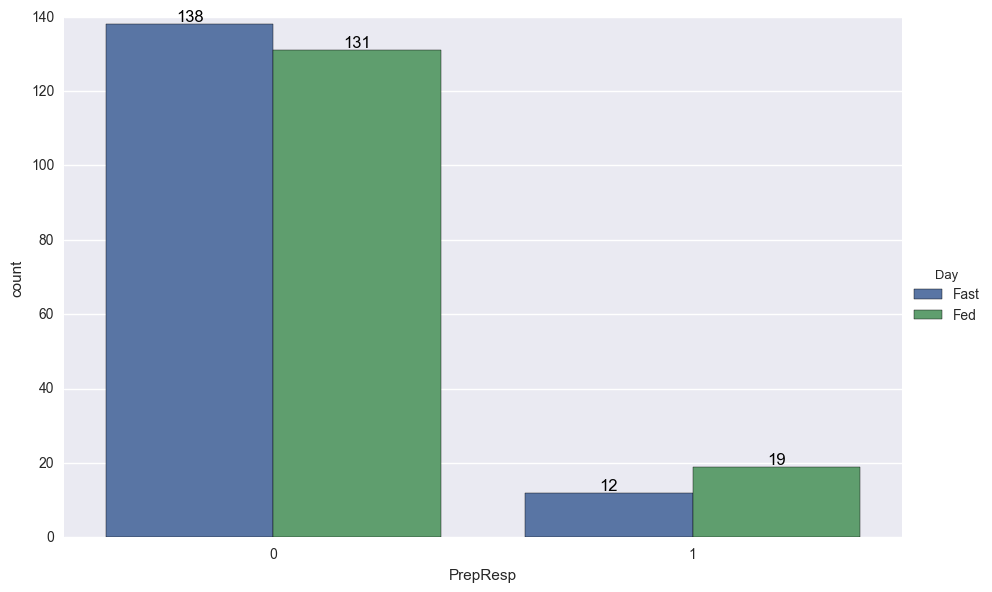

In [21]:
g = sns.factorplot(x="PrepResp", data=cbd, kind="count", hue="Day",
                   size=6, aspect=1.5)
#color="gray"

g.set_xticklabels(step=1)

#g.fig.suptitle("Faculty by Title and Gender (As of 6/17/15)",size=20,y=1.05)
#g.ax.set_xlabel("Position Title",size=20)
#g.ax.set_ylabel("Number of Faculty",size=20)

for p in g.ax.patches:
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')